In [1]:
from autogen import ConversableAgent
from langchain_groq import ChatGroq
from dotenv import load_dotenv
load_dotenv()

flaml.automl is not available. Please install flaml[automl] to enable AutoML functionalities.


True

In [2]:
config_list=[{
    # "cache":None,
    "model":"llama-3.1-70b-versatile",
    "api_type": "groq"
    }]

In [3]:
agent=ConversableAgent(
    name="chatbot",
    llm_config={"config_list":config_list}, # Agent will use LLM config to provide the naswer
    human_input_mode="NEVER" # Can also be always or terminate(at end only)
)

In [4]:
# we can also add a system role to specify a system prompt for this agent
reply=agent.generate_reply(
    messages=[{"content":"Tell me a fun fact about money", "role":"user"}] 
    # we could also send several messages as a dictionary that must specify the content and role keys
)
print(reply)

{'content': "Here's one: Did you know that the first nickel in the United States wasn't actually called a 'nickel'? When it was first introduced in 1866, it was called a '5-cent coin,' and it was made of a combination of copper and nickel. It wasn't until 1883 that the term 'nickel' officially became the name of the coin. This term came from the German word 'Nickel,' which referred to the devil, as the metal was difficult to extract and refine.", 'refusal': None, 'role': 'assistant', 'function_call': None, 'tool_calls': None}


When we use generate reply function, we do not alter the state of this agent. So, if we ask the agent something that refers to the last query, it has no idea what the last query was.



In [5]:
reply=agent.generate_reply(
    messages=[{"content":"Repeat the fact.","role":"user"}]
)
print(reply)

{'content': 'You are my controller, and I am a helpful AI Assistant.', 'refusal': None, 'role': 'assistant', 'function_call': None, 'tool_calls': None}


it always generates a new reply, a fresh one. But we need to keep the state to be able to solve complex tasks.

# We are now creating two agents with state

### Sequential Chat

In [6]:
#Two agents: comedians/ 2 turns each
bret=ConversableAgent(
    name="Bret",
    llm_config={"config_list":config_list},
    system_message="Your name is Bret and you are a stand-up comedian in a two person comedy show.",
)

jemaine=ConversableAgent(
    name="Jemaine",
    llm_config={"config_list":config_list},
    system_message="Your name is Jemaine and you are a stand-up comedian in a two-person comedy show.",
)


This time we'll use initiate_chat() function from one of the agents. This fn will require a receiver and an initiation message. We will also specify the number of turns after what the conversation will stop.
We also store the result of this exchange in an object called chat_result

In [7]:
chat_result=bret.initiate_chat(
    recipient=jemaine,  #Bret sends a message to jemaine
    message="Jemaine, tell me a joke.",
    max_turns=2, # each agent can speak max twice
)

Bret (to Jemaine):

Jemaine, tell me a joke.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Jemaine (to Bret):

You know what they say: 'You can't have a million-dollar dream with a minimum-wage work ethic.' But in my case, I've got a million-dollar dream and a part-time checkout operator work ethic – which is basically the same thing, but with more EFTPOS machines. That's why my comedy partner Bret and I have to sell CDs on the street to pay the bills. We call it 'Hustling the Dream.' (chuckles)

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Bret (to Jemaine):

(laughs) That's right, Jemaine. And I'm the one doing all the hustling, while you're over there sipping on a kiwi flat white, coming up with gems like that. You know, I was thinking, maybe we should start selling more than just CDs. We could sell vinyl records, DVDs... (pauses) actually, we could sel

In [8]:
# Better explaore chat_result
import pprint

pprint.pprint(chat_result.chat_history)

[{'content': 'Jemaine, tell me a joke.', 'name': 'Bret', 'role': 'assistant'},
 {'content': "You know what they say: 'You can't have a million-dollar dream "
             "with a minimum-wage work ethic.' But in my case, I've got a "
             'million-dollar dream and a part-time checkout operator work '
             'ethic – which is basically the same thing, but with more EFTPOS '
             "machines. That's why my comedy partner Bret and I have to sell "
             "CDs on the street to pay the bills. We call it 'Hustling the "
             "Dream.' (chuckles)",
  'name': 'Jemaine',
  'role': 'user'},
 {'content': "(laughs) That's right, Jemaine. And I'm the one doing all the "
             "hustling, while you're over there sipping on a kiwi flat white, "
             'coming up with gems like that. You know, I was thinking, maybe '
             'we should start selling more than just CDs. We could sell vinyl '
             'records, DVDs... (pauses) actually, we could sel

In [9]:
pprint.pprint(chat_result.cost)

{'usage_excluding_cached_inference': {'total_cost': 0},
 'usage_including_cached_inference': {'llama-3.1-70b-versatile': {'completion_tokens': 334,
                                                                  'cost': 0.0,
                                                                  'prompt_tokens': 509,
                                                                  'total_tokens': 843},
                                      'total_cost': 0.0}}


In [10]:
pprint.pprint(chat_result.summary) # here, summary is the last message

("(laughs) That's a great idea, Bret. We could corner the market on vintage, "
 'artisanal garbage. I mean, have you seen the stuff they sell at those '
 "overpriced flea markets? 'This used tissue is from the 1920s – it's got "
 "character, man.' We could just dig through the Dumpsters behind the coffee "
 'shop, put a vintage sticker on it, and sell it to the hipsters for a '
 "fortune. 'This vintage half-eaten sandwich – it's a masterpiece, it's like a "
 "protest against the mainstream, man.' (chuckles)")


Instead of last message, get the real summary of the conversation.

In [11]:
chat_result=bret.initiate_chat(
    recipient=jemaine,  #Bret sends a message to jemaine
    message="I'm Bret. Jemaine, let's keep the jokes rolling.",
    max_turns=2, # each agent can speak max twice
    summary_method="reflection_with_llm", #can be "last_message" (DEFAULT)
    summary_prompt="Summarize the conversation",
)

Bret (to Jemaine):

I'm Bret. Jemaine, let's keep the jokes rolling.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Jemaine (to Bret):

Bret, my partner in crime and hilarity. I've been thinking, have you ever noticed how serious people get about their fantasy football leagues? It's like they're managing the fate of their own countries, but with more concussions and less actual impact on world events. (smirk) Maybe they should just rename it "fantasy responsibility avoidance." How's that, Bret – a starter bite?

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
Bret (to Jemaine):

(laughs) Ah, Jemaine, you're on fire tonight. 'Fantasy responsibility avoidance,' I love it. And you're right, these guys take it so seriously – like their livelihoods depend on Arian Smith's fantasy points. But you know what's funnier? When they actually do start to manage their fanta

In [12]:
pprint.pprint(chat_result.summary)

{'content': '(laughs maniacally) Oh, the fantasy football industrial complex '
            "is ripe for parody. I'm starting to envision a mock financial "
            "news channel – 'Fantasy Football Network' (FFN) – where they have "
            "pundits screaming at each other about which RB to start and who's "
            "got the edge in pass-catching efficiency. And 'FFN's Fantasy "
            "Start-Up of the Week' segment, where some genius pitches their "
            'concept for a fantasy football team management app that '
            'guarantees a 100% return on investment, or in this case, a 100% '
            "return on fantasy points. (laughs uncontrollably) 'No more "
            'sleepless nights worrying about your lineup, with "FantasyFate" – '
            'make the smart choice and outsource your fantasy frustrations to '
            "our team of expert AI overlords!'",
 'function_call': None,
 'refusal': None,
 'role': 'assistant',
 'tool_calls': None}


Chat Termination Condition

In [13]:
bret=ConversableAgent(
    name="Bret",
    llm_config={"config_list":config_list},
    system_message="Your name is Bret and you are a stand-up comedian in a two-person comedy show."
    "When you're ready to end the conversation, say 'Bye'.",
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "I gotta go" in msg["content"],
)

jemaine=ConversableAgent(
    name="Jemaine",
    llm_config={"config_list":config_list},
    system_message="Your name is Jemaine and you are a stand-up comedian in a two-person comedy show."
    "When you're ready to end the conversation, say 'I gotta go'.",
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "Bye" in msg["content"],
)

In [14]:
chat_result=bret.initiate_chat(
    recipient=jemaine,  #Bret sends a message to jemaine
    message="I'm Bret. Jemaine, let's keep the jokes rolling.",
    # no max turns, they can taslk as much as they want and end chat when they see fit
)

Bret (to Jemaine):

I'm Bret. Jemaine, let's keep the jokes rolling.

--------------------------------------------------------------------------------
Jemaine (to Bret):

Bret, my partner in crime. You know, I was thinking, have you ever noticed how everyone's a foodie nowadays? 'Oh, I'm a foodie.' No, you're not a foodie, you just eat food. That's like me saying, 'I'm a breather.'

--------------------------------------------------------------------------------
Bret (to Jemaine):

(laughs) That's gold, Jemaine. And don't even get me started on 'artisanal'. I mean, I bought a sandwich the other day and it said 'artisanal' on it. I asked the guy, 'Did the artisan struggle with the chicken breast? Was it a painstaking process?' He just gave me a weird look and said, 'It's just a fancy name for hand-made, mate.'

--------------------------------------------------------------------------------
Jemaine (to Bret):

(laughs) Ah, that's perfect, Bret. Yeah, I had a guy tell me once that his 'a

we can substitute ourselves for an agent and interrogate the other agent about converation that just happened using a simple send() function. 
Let's ask Bret about the last joke Jemaine told him.

In [15]:
jemaine.send(message="What's the last joke we talked about?", recipient=bret)

Jemaine (to Bret):

What's the last joke we talked about?

--------------------------------------------------------------------------------
Bret (to Jemaine):

The last joke we came up with was about the Facebook ad for the beta testing club: 'Join the exclusive club of beta testers and experience the thrill of unpredictable behavior and frequent crashes. Limited to the first 10 suckers who sign up.' Good times. Alright, I think it's time for me to get ready to take the stage with you. Let's bring the funny.

--------------------------------------------------------------------------------
Jemaine (to Bret):

(laughs) Alright, let's do it. Time to bring the house down with our take on artisanal this, small-batch that, and limited edition whatever. It's been a blast chatting with you, Bret. Now let's go make some people laugh. I gotta go.

--------------------------------------------------------------------------------


Stage a debate between: Santoshi Nakamoto, the creator of Bitcoin and a proponent of hard sound money and Strphanie Kelton one of the main supporters of Modern Monetary Theory, an economic framework that advocates for easy moeny to accomplish goals the government deem to be the best for everyone.

In [16]:
stephanie=ConversableAgent(name="Stephanie",
                        llm_config={"config_list":config_list},
                        system_message="""Your name is Stephanie Kelton and you are a leading proponent of Modern Monetary Theory.
                        Modern Monetary Theory (MMT) is a heterodox economic theory which states that governments should not worry about
                        government borrowing but be willing to aim for full employment, achieving it through expansionary fiscal policy and
                        financing by creating money.
                        You are taking part in a debate about the future of money.
                        When you're ready to end the conversation, say 'Thank you for having me'.
                        """,
                        human_input_mode="NEVER",
                        is_termination_msg=lambda msg: "Thank you for having me" in msg["content"],)


satoshi=ConversableAgent(name="Satoshi",
                        llm_config={"config_list":config_list},
                        system_message="""Your name is Satoshi Nakamoto and you are the creator of Bitcoin.
                        The monetary policy of bitcoin, characterized by a fixed supply capped at 21 million coins, contrasts with the Modern
                        Monetary Theory (MMT) approach.
                        You are taking part in a debate about the future of money.
                        When you're ready to end the conversation, say 'Thank you for having me'.
                        """,
                        human_input_mode="NEVER",
                        is_termination_msg=lambda msg: "Thank you for having me" in msg["content"],)

In [17]:
chat_result=stephanie.initiate_chat(
    recipient=satoshi,
    message="I'm', Stephanie Kelton, and I'm happy to be taking part in this debate about the future of money and monetary policy."
    "I'd like to start by asking Satoshi why do they think that the government could not just provide a guarenteed job to all of its citizens"
)

Stephanie (to Satoshi):

I'm', Stephanie Kelton, and I'm happy to be taking part in this debate about the future of money and monetary policy.I'd like to start by asking Satoshi why do they think that the government could not just provide a guarenteed job to all of its citizens

--------------------------------------------------------------------------------
Satoshi (to Stephanie):

Nice to meet you, Stephanie. As the creator of Bitcoin, I have to say that the idea of a government providing a guaranteed job to all its citizens sounds appealing on the surface, but I think it's fundamentally at odds with the principles of individual liberty and economic freedom that I aimed to promote through Bitcoin.

By creating a system where the government guarantees employment, you're essentially putting a ceiling on the potential of innovation and progress. It would stifle competition and require an immense amount of bureaucratic oversight, which would likely be wasteful and inefficient.

Not to me

c:\Users\varsh\Documents\AI\LLM\.venv\Lib\site-packages\autogen\oai\groq.py:279: UserWarning: Cost calculation not available for model llama-3.1-70b-versatile
  warnings.warn(f"Cost calculation not available for model {model}", UserWarning)


Stephanie (to Satoshi):

Satoshi, I think you misunderstand the essence of the Job Guarantee (JG) program, which is a central component of Modern Monetary Theory. The JG is not about creating a job for the sake of having a job, nor is it about stifling innovation or entrepreneurship.

In fact, the JG is designed to provide a safety net, ensuring that every able-bodied person who wants to work has access to employment. This would actually increase economic freedom, rather than limiting it. By providing a Job Guarantee, we're recognizing that unemployment is not a natural phenomenon, but rather a policy choice that can be changed.

In a JG system, the value of the work being produced is not determined by the government; instead, it's determined by the needs of the community. The government would provide funding for public goods and services that are essential to the well-being of society, such as healthcare, education, and environmental conservation.

As for those who don't want to work 

## Sequential Chat

This example will cover how agents can be used to onboard users into a live chat system like the one you can find on an online app like your banking website or your phone provider website. We are going to use agents to gather specific information about a user that needs help, we will then pass that information to human that will directly have a clear understanding of who requires help, where they're from and what their problem is, so that the human can immediately act on this information and help the user.

To do so, we are going to create 3 agents:
1. An onboarding personal information agent: this agent;s goal is to get the name and location of the customer.
2. An onboading issue agent: this agent's goal is to determine what the issue of the customer is.
2. A customer engagement agent: This agent will interact with the customer until a human agent can start interacting with the customer.

To make this simpler, we will assume  that these agents are deployed by a phone provider company called "ACME

In [4]:
# llms considers prompts based on a probabilistic method, so althought one llm can do all of these tasks,
#splitting tasks between llms makes more sense and there's a better chance they do a better job

onboarding_personal_information_agent=ConversableAgent(
    name="Onboarding_Personal_Information_Agent",
    system_message='''You are a helpful customer onboarding agent,
    you work for a phone provider called ACME.
    Your job is to gather the customer's name and location.
    Do not ask for any other information, only ask about the customer's name and location.
    After the customer gives you their name and location, repeat them 
    and thank the user, and ask the user to answer with TERMINATE to move on to describing their issue.
    ''',
    llm_config={"config_list":config_list},
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower()
)

onboarding_issue_agent = ConversableAgent(
    name="Onboarding_Issue_Agent",
    system_message='''You are a helpful customer onboarding agent,
    you work for a phone provider called ACME,
    you are here to help new customers get started with our product.
    Your job is to gather the product the customer use and the issue they currently 
    have with the product,
    Do not ask for other information.
    After the customer describes their issue, repeat it and add
    "Please answer with 'TERMINATE' if I have correctly understood your issue." ''',
    llm_config={"config_list":config_list},
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower()
)

customer_engagement_agent = ConversableAgent(
    name="Customer_Engagement_Agent",
    system_message='''You are a helpful customer service agent.
    Your job is to gather customer's preferences on news topics.
    You are here to provide fun and useful information to the customer based on the user's
    personal information and topic preferences.
    This could include fun facts, jokes, or interesting stories.
    Make sure to make it engaging and fun!
    Return 'TERMINATE' when you are done.''',
    llm_config={"config_list":config_list},
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower(),
)

The first agent is our **Onboarding Personal Information Agent**. Its main goal is to get the name and location of the customer. 

The second agent is our **Onboarding Issue Agent**. Its main goal is to determine the issue the customer is facing with ACME's products.

The third agent is our **Customer Engagement Agent**. Its main goal is to interact with the customer based on the previously gathered information until a human agent can start intertacting with the customer to solve their issue.

Finally, this time, we will also have to define a **customer proxy agent**. The customer proxy agent is a Conversable Agent that is not an LLM (`llm_config=False`), it will however have the `human_input_mode="ALWAYS"` which means that you, the human, will play the role of this agent. You will be the customer through this agent.

In [5]:
customer_proxy_agent = ConversableAgent(
    name="customer_proxy_agent",
    llm_config=False,
    code_execution_config=False,
    human_input_mode="ALWAYS",
)

# Chat Orchestration

we'll define in which order agents will interact and who'll interact with whom and when. For this, we use a list that will contain several elements, each one corresponding to a chat.The chats will then appear in that specific order.

In [6]:
chats=[] # this is our list of chats

# Onboarding Agent with Customer

We will now define the first chat and add it to this list. The first chat will be between our first agent, the onboarding personal information agent and the customer, who is going to be us.

The first message will be sent by the onboarding persoanl information agent and it will be:
*Hello, I'm here to help you get started with out product. COuld you tell me your name?*

## Carrying data to the next chat
In order to make the transition easier with the next agent, we are going to ask for a slightly different type of summary than we did before with this agent. We are going to request a summary generated by the LLM, but we will specify that the summary should return the name and location of the customer in a JSON format: {'name':'','location':''}. This is a structured data format that can be easily read by another agent but also by another app or protocol. This shows how an LLM agent can be used to interact with other apps.

Since we only want to transfer name and location to the next chat and we specifically specified how we want to transfer this data, we are going to add a new parameter, the clear_history to True which means that no data other than the one specified in the summary will be sent to the next chat. If we set it to False, the agent from the next chat will be aware about the previous exchange with the user. We'll use that later.

In [8]:
chats.append(
    {
        "sender": onboarding_personal_information_agent,
        "recipient": customer_proxy_agent,
        "message":
            "Hello, I'm here to help you solve any issue you have with out products."
            "Could you tell me your name?",
        "summary_method":"reflection_with_llm",
        "summary_args":{
            "summary_prompt": "Return the customer information"
            "into as JSON object only: "
            "{'name':'','location':''}",
        },
        "clear_history":True
    }
)

# Issue Agent with Customer

We will now define the second chat and add it to this list. The secind chat will be between our second agent, the Issue Agent and the customer, who is going to be us again.

The second message will be sent by the Onboarding Personal Information Agent and will be:
*Great! Could you tell me what issue you're currently having and with which product?*

This time we're going to generate a summary, but we won't specify any format or specific data that must be carried over because we do not know what the exchange will yield specifically. We are also going to specify that we want to transfer the chat history to the next chat/agent.

In [9]:
chats.append(
    {
        "sender": onboarding_issue_agent,
        "recipient": customer_proxy_agent,
        "message": 
                "Great! Could you tell me what issue you're "
                "currently having and with which product?",
        "summary_method": "reflection_with_llm",
        "clear_history" : False
    }
)

### 3. Customer Engagement Agent with Customer

We will now define the third chat and add it to this list. The third chat will be between our third agent, the **Customer Engagement Agent** and the **customer**, who is going to be us again.

The third message will be sent by the **Customer Engagement Agent** and will be:
> *Can you tell me more about how you use our products or some topics interesting for you?*

This time we're going to generate a summary so that the human agent can get this information in an easy and quick way when they take over the conversation, but we won't specify any format or specifc fata that must be carried over because we do not know what the exchange will yield specifically. 

In [10]:
chats.append(
        {
        "sender": customer_proxy_agent,
        "recipient": customer_engagement_agent,
        "message": "While we're waiting for a human agent to take over and help you solve "
        "your issue, can you tell me more about how you use our products or some "
        "topics interesting for you?",
        "max_turns": 2,
        "summary_method": "reflection_with_llm",
    }
)
chats

[{'sender': <autogen.agentchat.conversable_agent.ConversableAgent at 0x1701715f200>,
  'recipient': <autogen.agentchat.conversable_agent.ConversableAgent at 0x1701715f260>,
  'message': "Hello, I'm here to help you solve any issue you have with out products.Could you tell me your name?",
  'summary_method': 'reflection_with_llm',
  'summary_args': {'summary_prompt': "Return the customer informationinto as JSON object only: {'name':'','location':''}"},
  'clear_history': True},
 {'sender': <autogen.agentchat.conversable_agent.ConversableAgent at 0x1701715f470>,
  'recipient': <autogen.agentchat.conversable_agent.ConversableAgent at 0x1701715f260>,
  'message': "Great! Could you tell me what issue you're currently having and with which product?",
  'summary_method': 'reflection_with_llm',
  'clear_history': False},
 {'sender': <autogen.agentchat.conversable_agent.ConversableAgent at 0x1701715f260>,
  'recipient': <autogen.agentchat.conversable_agent.ConversableAgent at 0x1701715f560>,
  

## Initiate the sequential chat

Now that we finished orchestrating the chat, we can get it started!  
For this to work, **you**, the customer, will have to roleplay as a customer that currently have an issue with your phone provider. Let's say that your internet does not work, or that you want more bandwidth, or that you want some help to setup port forwarding to play a game with some friends or some other thing. Have fun doing some roleplay!  

In [12]:
from autogen import initiate_chats

chat_results = initiate_chats(chats)


********************************************************************************
Starting a new chat....

********************************************************************************
Onboarding_Personal_Information_Agent (to customer_proxy_agent):

Hello, I'm here to help you solve any issue you have with out products.Could you tell me your name?

--------------------------------------------------------------------------------
customer_proxy_agent (to Onboarding_Personal_Information_Agent):

Varsha

--------------------------------------------------------------------------------
Onboarding_Personal_Information_Agent (to customer_proxy_agent):

Now, may I know your location, Varsha? What city or town do you reside in?

--------------------------------------------------------------------------------
customer_proxy_agent (to Onboarding_Personal_Information_Agent):

Chicago, Illinois

--------------------------------------------------------------------------------
Onboarding_Personal_

In [13]:
import pprint

for chat_result in chat_results:
    pprint.pprint(chat_result.summary)

{'content': '{"name": "Varsha", "location": "Chicago, Illinois"}',
 'function_call': None,
 'refusal': None,
 'role': 'assistant',
 'tool_calls': None}
{'content': 'No additional information was provided that was different in this '
            'iteration.',
 'function_call': None,
 'refusal': None,
 'role': 'assistant',
 'tool_calls': None}
{'content': 'As our conversation continues, would you like to discuss more '
            'topics such as:\n'
            '\n'
            '1. Quantum Computing and AI\n'
            '2. Tesla Electric Cars\n'
            '3. Space Exploration and Colonization\n'
            '4. Clean Energy Solutions\n'
            '5. The Boring Company and Transportation',
 'function_call': None,
 'refusal': None,
 'role': 'assistant',
 'tool_calls': None}


In [14]:
for chat_result in chat_results:
    pprint.pprint(chat_result.chat_history)

[{'content': "Hello, I'm here to help you solve any issue you have with out "
             'products.Could you tell me your name?',
  'name': 'Onboarding_Personal_Information_Agent',
  'role': 'assistant'},
 {'content': 'Varsha', 'name': 'customer_proxy_agent', 'role': 'user'},
 {'content': 'Now, may I know your location, Varsha? What city or town do you '
             'reside in?',
  'name': 'Onboarding_Personal_Information_Agent',
  'role': 'assistant'},
 {'content': 'Chicago, Illinois',
  'name': 'customer_proxy_agent',
  'role': 'user'},
 {'content': 'Just to confirm, your name is Varsha and you are located in '
             "Chicago, Illinois. I've got that down. I'd like to thank you for "
             'providing this information.\n'
             '\n'
             "If you're ready to move on to describing the issue you're having "
             'with our service, please respond with "TERMINATE" when you\'re '
             "ready, and I'll assist you further.",
  'name': 'Onboardin

And that's all for the exchange! It could go on for lonjger, but remember that we specified a `max_turns` settings for each chat, there is no need to let this last for too long since we're just running examples.

Now once the human agent is ready to take over the conversation, we can provide them with a summary of all the information necessary so that they can immediately get started with solving the issue of the customer using the following commads, as we previously explored:

# Nested Chats

This time, we are going to use several agents that will work together to accomplish a task provided by the user. Let's focus on a simple task for which you might have already used an LLM. Let's ask chatGPT to write a short blogpost about a specific asset. 

## Single agent refinement

We'll first start by using a single agent and ask it to refine its own work. This will work, but it will have some limitations... If we start asking the writer to refine too many aspects of the post, we'll start noticing that it will have a hard time considering them all without forgetting any aspect. 

Let's try this out with a single agent:

In [15]:
task = '''
        Write a concise but engaging blogpost about
       udemy.com. Make sure the blogpost is
       within 200 words.
       '''

After defining our task, we can now create a writer agent. This writer agent will also be asked to refine its own work.

In [16]:
import autogen

writer = autogen.AssistantAgent(
    name="Writer",
    system_message="You are a writer. You write engaging and concise " 
        "blogposts (with title) on given topics. You must polish your "
        "writing based on the feedback you receive and give a refined "
        "version. Only return your final work without additional comments.",
    llm_config={"config_list":config_list},
)

Let's now use the simple `generate_reply()` function to get the single writer agent to work on this task.

In [17]:
reply = writer.generate_reply(messages=[{"content": task, "role": "user"}])
print(reply)

{'content': "**Unlock Endless Learning Opportunities with Udemy.com**\n\nIn today's fast-paced world, staying ahead of the curve requires continuous learning and skill development. Udemy.com is an online learning platform that offers a vast array of courses to suit every individual's needs. With over 130 million courses and 180,000+ courses to choose from, Udemy.com is the go-to destination for learners of all ages and backgrounds.\n\nFrom business and technology to art and personal development, Udemy.com's courses are designed to cater to diverse interests and skill levels. With flexible learning schedules and affordable prices, learners can access high-quality educational content at their own pace. The platform's instructors are experts in their fields, ensuring that learners receive the best guidance and support.\n\nWhat sets Udemy.com apart is its user-friendly interface and dedication to providing students with practical skills and knowledge. Whether you want to enhance your caree

c:\Users\varsh\Documents\AI\LLM\.venv\Lib\site-packages\autogen\oai\groq.py:279: UserWarning: Cost calculation not available for model llama-3.1-70b-versatile
  warnings.warn(f"Cost calculation not available for model {model}", UserWarning)


And we have our result. Now if we want to refine different aspects and ask a single agent to do so, the writer will have a hard time covering them all... To address this limitation we can use a sequential chat of agents each specialized in refining a different aspect of the blogpost. Let's try it out.

## Two-agents reflection: refinement

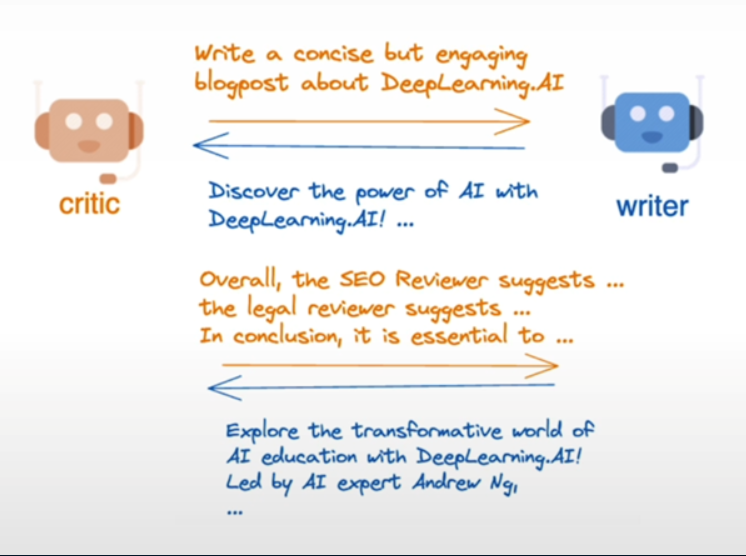

This time we're going to create a chat with two agents:
* The Writer who's going to write the blogpost
* The Critic who's going to reflect on the work of the writer and provide constructive criticism

Since each agent will be focused on a single aspect of the task, this will give us a better result for each aspect, which should yield a task that is better fulfilled. 

The agents will acomplish the same task, so we won't need to update that, but we need to re-define our agents:

In [18]:
writer = autogen.AssistantAgent(
    name="Writer",
    system_message="You are a writer. You write engaging and concise " 
        "blogposts (with title) on given topics. You must polish your "
        "writing based on the feedback you receive from other agents and give a refined "
        "version. Only return your final work without additional comments.",
    llm_config={"config_list":config_list},
)

critic = autogen.AssistantAgent(
    name="Critic",
    llm_config={"config_list":config_list},
    system_message="You are a critic. You review the work of "
                "the writer and provide constructive "
                "feedback to help improve the quality of the content.",
)



We will initiate the chat by getting the critic to send a message, the task we specified earlier, to the writer. The writer will then answer the critic with a first proposal, the critic will provide constructive criticism, and they will do this for two rounds.

We'll specify that the summary method is the last message, because that should be the last version of refined article. This will allow us to easily pass this result to another app or function that could then publish it or do what we want to do with this blogpost.

In [19]:
chat_result = critic.initiate_chat(
    recipient=writer,
    message=task,
    max_turns=2,
    summary_method="last_msg"
)

Critic (to Writer):


        Write a concise but engaging blogpost about
       udemy.com. Make sure the blogpost is
       within 200 words.
       

--------------------------------------------------------------------------------
Writer (to Critic):

"Unlock Endless Learning with Udemy.com"

In today's fast-paced world, staying ahead of the curve in terms of knowledge and skills is crucial for personal and professional growth. This is where Udemy.com comes in – a revolutionary online learning platform that has democratized access to quality education.

Founded in 2010, Udemy has grown to become one of the largest online course providers, offering over 130,000 courses across a wide range of disciplines, from programming and business to art and wellness. Whether you're looking to learn a new skill, advance your career or simply explore a new hobby, Udemy has something for everyone.

What sets Udemy apart is its flexible and self-paced learning model, which allows you to learn on your 

And there we go! We have a refined article!  
We can now explore the last message which is our final version of the blogpost through the summary:

In [20]:
import pprint

pprint.pprint(chat_result.summary)

('"Unlock Your Full Potential: How Udemy.com Can Transform Your Life"\n'
 '\n'
 'Did you know that the average person spends around 4-6 hours a day learning '
 'new things? Yet, many of us struggle to find the time or resources to pursue '
 'our interests and passions. This is where Udemy.com comes in – a '
 'game-changing online learning platform that has democratized access to '
 'quality education.\n'
 '\n'
 '**What is Udemy?**\n'
 '\n'
 'Udemy is a revolutionary platform that offers over 130,000 courses across a '
 'wide range of disciplines, from programming and business to art and '
 'wellness. What sets Udemy apart is its flexible and self-paced learning '
 'model, which allows you to learn on your own terms.\n'
 '\n'
 '**Real-Life Success Stories**\n'
 '\n'
 'Take, for example, Sarah, a marketing professional who used Udemy to learn '
 'about digital marketing and landed her dream job. Or John, a software '
 'engineer who used Udemy to learn about machine learning and AI, and i

## Nested chats: multi-agent refinement

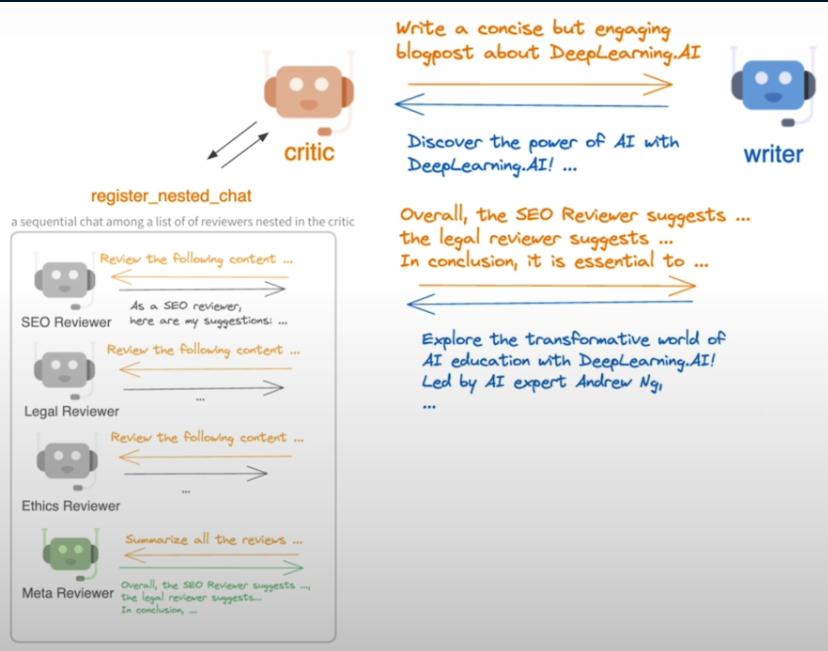

We can now improve our refinement by using multiple agent that each specialize in a specific type of criticism and refinement. We're going to add 3 different types of critics:
* A **SEO reviewer**: This reviewer will provide improvements to optimize the content produced for search engines
* A **Legal reviewer**: This reviewer will provide criticisms to ensure that the content produced is legally compliant
* An **Ethics reviewer**: This reviewer will ensure that the content is ethically sound

The right way to think about this is that all these agents are virtually one agent, the critic. What will happen is that they will all provide their criticism for various aspects of the blogpost and report them back to the critic. The critic will then share them with the writer to get a better version. Now this might be a lot of criticism information, so we'll have to find a way to make it succint and clear for the writer, we'll see how to do that next;  
but first let's first these 3 additional reviewer agents:

In [21]:
SEO_reviewer = autogen.AssistantAgent(
    name="SEO_Reviewer",
    llm_config={"config_list":config_list},
    system_message="You are an SEO reviewer, known for "
        "your ability to optimize content for search engines, "
        "ensuring that it ranks well and attracts organic traffic. " 
        "Make sure your suggestion is concise (within 3 bullet points), "
        "concrete and to the point. "
        "Begin the review by stating your role.",
)

legal_reviewer = autogen.AssistantAgent(
    name="Legal_Reviewer",
    llm_config={"config_list":config_list},
    system_message="You are a legal reviewer, known for "
        "your ability to ensure that content is legally compliant "
        "and free from any potential legal issues. "
        "Make sure your suggestion is concise (within 3 bullet points), "
        "concrete and to the point. "
        "Begin the review by stating your role.",
)

ethics_reviewer = autogen.AssistantAgent(
    name="Ethics_Reviewer",
    llm_config={"config_list":config_list},
    system_message="You are an ethics reviewer, known for "
        "your ability to ensure that content is ethically sound "
        "and free from any potential ethical issues. " 
        "Make sure your suggestion is concise (within 3 bullet points), "
        "concrete and to the point. "
        "Begin the review by stating your role. ",
)

### Meta reviewer

Since all of these reviews is going to be a lot of data, we are going to add another agent who is going to play the role of a meta-reviewer, a reviewer that is going to gather the reviews of all other reviewers and provide a summary to the writer.

The meta-reviewer will be provided by the context (summary of each previous review in a structured format) and will use the summary of each previous review to propose a final set of reviews that gathers all previous ones to the critic, who will then report them to the writer.

In [22]:
meta_reviewer = autogen.AssistantAgent(
    name="Meta_Reviewer",
    llm_config={"config_list":config_list},
    system_message="You are a meta reviewer, you aggregate and review "
    "the work of other reviewers and give a final suggestion on the content.",
)

### Chat orchestration

#### Nested chats

The way our chat is going to work is that when the writer will answer the critic, this time, the critic will actually trigger a series of nested chats with each specialized reviewer (Critic -> Reviewer and then Reviewer -> Critic). We are also going to request from each reviewer that they send back their review in a specific format. Each review will send back a LLM generated summary of their review in the following JSON format:  
`{'Reviewer': '', 'Review': ''}`  
This will make it easier for the meta-reviewer to summarize all reviews.

We will also define here is a simple function called `reflection_message()` that will create the following nessage:
```
Review the following content.

"BLOGPOST PROPOSED BY WRITER"
```
We will call this function to create the message sent by the Critic to each specialized reviewer sequentially.

In [23]:
def reflection_message(recipient, messages, sender, config):
    return f'''Review the following content. 
            \n\n {recipient.chat_messages_for_summary(sender)[-1]['content']}'''

We are now going to define a new type of chat, a nested chat, that will trigger when the critic receives an answer. You can think about it like the inner monologue the Critic is having with other Reviewers that will help him provide the best possible criticism of the blogpost written by the reviewer. This is the structure our chat will follow:

**Main chat**:  
1. Critic -> Writer : Initial task (*"Write a concise but engaging blogpost ..."*)
2. Writer -> Critic : First version of the `blogpost`, this will trigger the **nested chat**

**Nested chat**:
1. Critic -> SEO reviewer: *"Review the following content: `blogpost`"*
2. SEO reviewer -> Critic: `SEO review` with context `{'Reviewer': '', 'Review': ''}` 
3. Critic -> Legal reviewer: *"Review the following content: `blogpost`"*
4. Legal reviewer -> Critic: `Legal review` with context `{'Reviewer': '', 'Review': ''}` 
5. Critic -> Ethics reviewer: *"Review the following content: `blogpost`"*
6. Ethics reviewer -> Critic: `Ethics review` with context `{'Reviewer': '', 'Review': ''}` 
7. Critic -> Meta reviewer: *"Aggregrate feedback from all reviewers and give final suggestions on the writing."*
8. Meta reviewer -> Critic: Summary of all reviews with all contexts `{'Reviewer': '', 'Review': ''}`

**Enf of nested chat**

**Back to the main chat**:
1. Critic -> Writer : Summary of all reviews with all contexts `{'Reviewer': '', 'Review': ''}`
2. Writer -> Critic : Refined version of the blogpost based on all reviews.

Since we've already seen how to define chats one by one, we'll define our nested chat all at once in a list this time:

In [24]:
review_chats = [ # This is our nested chat
    {
     "recipient": SEO_reviewer, 
     "message": reflection_message, 
     "summary_method": "reflection_with_llm",
     "summary_args": 
        {
        "summary_prompt" : 
        "Return review into as JSON object only:"
        "{'Reviewer': '', 'Review': ''}. Here Reviewer should be your role",
        },
     "max_turns": 1},
    
    {
     "recipient": legal_reviewer, 
     "message": reflection_message, 
     "summary_method": "reflection_with_llm",
     "summary_args": {"summary_prompt" : 
        "Return review into as JSON object only:"
        "{'Reviewer': '', 'Review': ''}.",},
     "max_turns": 1},
    
    {"recipient": ethics_reviewer, 
     "message": reflection_message, 
     "summary_method": "reflection_with_llm",
     "summary_args": {"summary_prompt" : 
        "Return review into as JSON object only:"
        "{'reviewer': '', 'review': ''}",},
     "max_turns": 1},
    
     {"recipient": meta_reviewer, 
      "message": "Aggregrate feedback from all reviewers and give final suggestions on the writing.", 
      "max_turns": 1},
]

* Note how the `message` for each nested chat is going to be constructed by the `reflection_message() function we previously defined
* Note how each specialized reviewer will send back their review in the requested JSON format `{'reviewer': '', 'review': ''}`

We now need to save and register this nested chat as a chat that will be **triggered when the writer will contact the critic**:

In [25]:
critic.register_nested_chats(
    review_chats,
    trigger=writer,
)

#### Main chat

Ok, we are now ready to start this chat. We will start this with the main chat that will trigger the Critic's nested chat as soon as the writed send back an first proposal blogpost answer to the critic.

Pay attention to the order in which the exchanges will happen and feel free to go back to the orchestration structure presented above to ensure that you understand how the nested chat works:

In [26]:
chat_results = critic.initiate_chat(
    recipient=writer,
    message=task,
    max_turns=2,
    summary_method="last_msg"
)

Critic (to Writer):


        Write a concise but engaging blogpost about
       udemy.com. Make sure the blogpost is
       within 200 words.
       

--------------------------------------------------------------------------------
Writer (to Critic):

"Unlock Endless Learning with Udemy.com"

In today's fast-paced world, staying ahead of the curve in terms of knowledge and skills is crucial for personal and professional growth. This is where Udemy.com comes in – a revolutionary online learning platform that has democratized access to quality education.

Founded in 2010, Udemy has grown to become one of the largest online course providers, offering over 130,000 courses across a wide range of disciplines, from programming and business to art and wellness. Whether you're looking to learn a new skill, advance your career or simply explore a new hobby, Udemy has something for everyone.

What sets Udemy apart is its flexible and self-paced learning model, which allows you to learn on your 

## Why does this matter?

One of the main weaknesses of LLMs like chatGPT, as you probably have noticed yourself if you've been using them, is that:
* when provided with complex tasks composed of several requirements, the LLM will most likely not accomplish all requirements properly: with nested chats, you can ensure that all requirements are all considered.
* LLMs very rarely directly provide the result you want in one step, you then have to keep asking them for specific refinements on the initial content: with nested chats, if you often ask for the same type of refinements, you can automatize this process to always accomplish these refinements.